# Q1.Company_Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
cd =pd.read_csv("D:\Assignment\Assingments\Decision Tree\Company_Data.csv")
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
cd.loc[cd['Sales']<=7.5, 'sales']= 'low'
cd.loc[cd['Sales']>=7.5, 'sales']= 'high'

In [5]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


In [6]:
#label encoding for categorical columns
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
cd['ShelveLoc']= label_encoding.fit_transform(cd['ShelveLoc'])
cd['Urban']= label_encoding.fit_transform(cd['Urban'])
cd['US']= label_encoding.fit_transform(cd['US'])
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [7]:
cd1 = cd.drop(columns='Sales')
cd1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,high
396,139,23,3,37,120,2,55,11,0,1,low
397,162,26,12,368,159,2,40,18,1,1,low
398,100,79,7,284,95,0,50,12,1,1,low


In [8]:
# Defining Dependent & Independent variable
x= cd1.iloc[:,0:10]
y=cd1['sales']

In [9]:
cd1['sales'].unique()
cd1.sales.value_counts()

low     201
high    199
Name: sales, dtype: int64

In [10]:
# Splitting into Train and Test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state= 40)

# Decision Tree Classifier (C 5.0) using Entropy criteria

In [11]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)

Text(0.5, 1.0, ' Decision tree using Entropy (CART)')

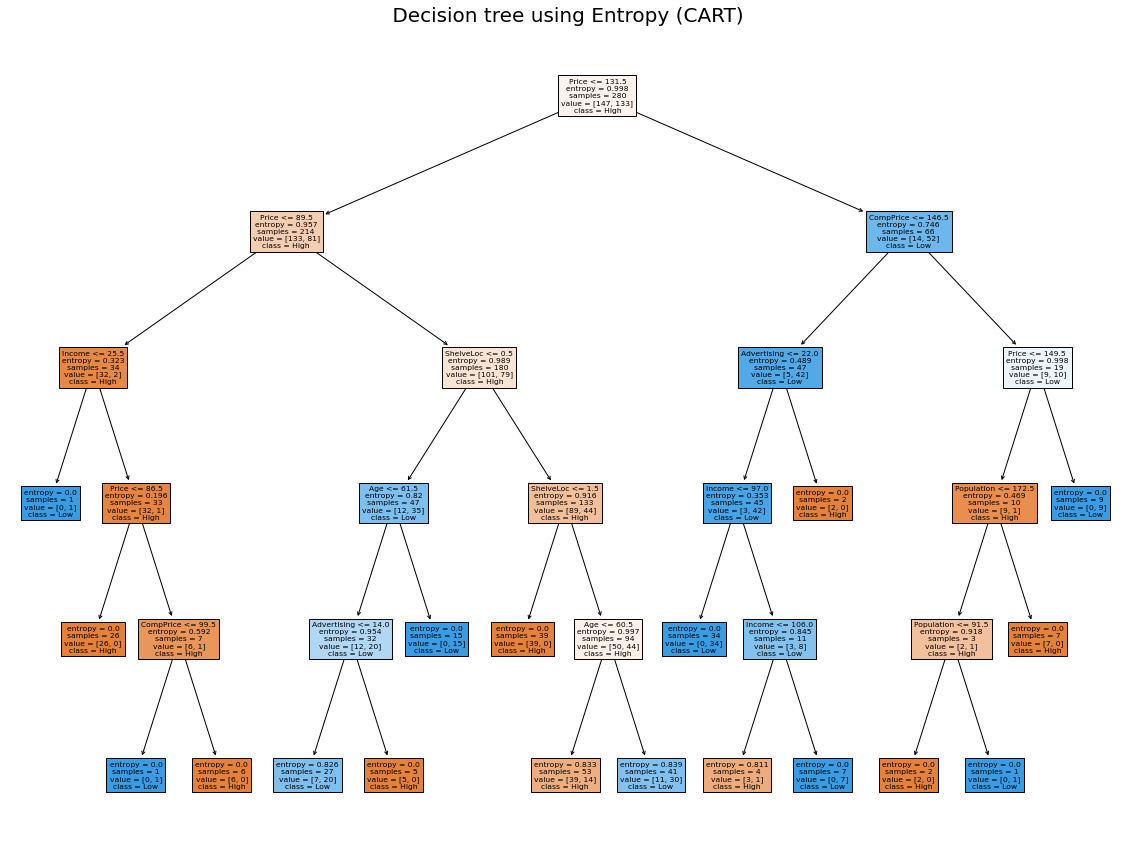

In [12]:
# plot the decissio# Visualizing our Decision Tree

figure= plt.figure(figsize=(20,15))
tree.plot_tree(model, 
               feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], 
               class_names=['High','Low'],
               filled=True);
plt.title(' Decision tree using Entropy (CART)', fontsize=20)

In [13]:
# Predicting on test data
pred = model.predict(x_test)
pd.Series(pred).value_counts()

low     65
high    55
dtype: int64

In [14]:
pred

array(['low', 'low', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'low', 'low', 'high', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high',
       'low', 'high', 'low', 'low', 'low', 'high', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'high', 'high'], dtype=

In [15]:
# Cross Table
pd.crosstab(y_test,pred)

col_0,high,low
sales,,
high,35,17
low,20,48


In [16]:
# Accuracy 
np.mean(pred==y_test)

0.6916666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [17]:
model1 =DecisionTreeClassifier(criterion='gini', max_depth=5)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

Text(0.5, 1.0, 'Decision tree using Gini impurity(CART)')

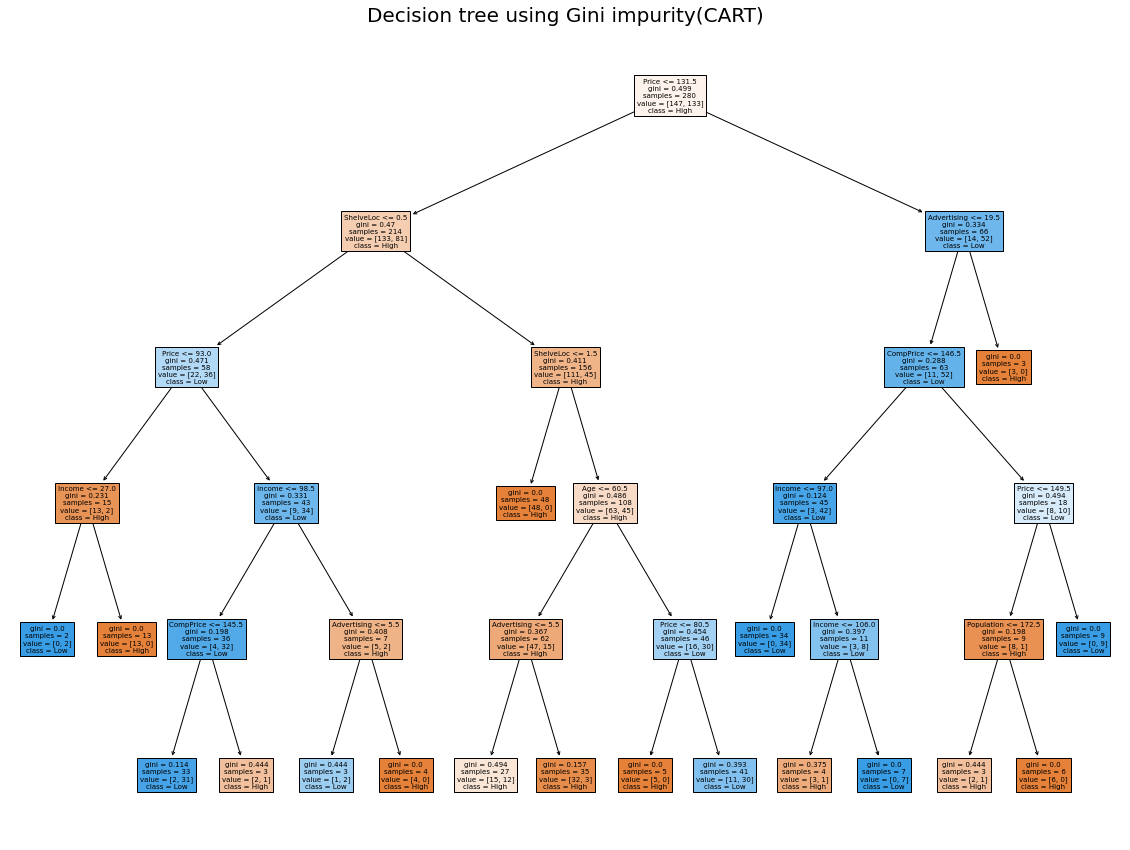

In [18]:
#Visualizing Decision Tree

figure= plt.figure( figsize=(20,15))
tree.plot_tree(model1,feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'], 
               class_names=['High','Low'],
               filled=True);
plt.title('Decision tree using Gini impurity(CART)', fontsize=20)

In [19]:
#predicting on test data
pred_gini =model1.predict(x_test)
pd.Series(pred_gini).value_counts()

low     62
high    58
dtype: int64

In [20]:
# Cross Table
pd.crosstab(y_test,pred_gini)

col_0,high,low
sales,,
high,35,17
low,23,45


In [21]:
# Accuracy
np.mean(pred_gini==y_test)

0.6666666666666666

Accuracy -- Entropy = 0.6916666666666667
               Gini = 0.6666666666666666

# Q2. Fraud_check

In [22]:
fc = pd.read_csv("D:\Assignment\Assingments\Random Forests\Fraud_check.csv")
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [23]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [24]:
fc.loc[fc['Taxable.Income']<= 30000,'taxable_income'] = 'Risky'
fc.loc[fc['Taxable.Income']>= 30000,'taxable_income'] = 'Good'

In [25]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [26]:
#label encoding for categorical columns
label_encoder=preprocessing.LabelEncoder()
fc['Undergrad']=label_encoder.fit_transform(fc['Undergrad'])
fc['Marital.Status']=label_encoder.fit_transform(fc['Marital.Status'])
fc['Urban']=label_encoder.fit_transform(fc['Urban'])

In [27]:
fc1 = fc.drop(columns='Taxable.Income')
fc1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [28]:
# Defining Dependent & Independent variable
x= fc1.iloc[:,0:5]
y=fc1['taxable_income']

In [29]:
fc1['taxable_income'].unique()
fc1.taxable_income.value_counts()

Good     476
Risky    124
Name: taxable_income, dtype: int64

In [30]:
# Splitting into Train and Test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25, random_state= 40)

# Decision Tree Classifier (C 5.0) using Entropy criteria

In [31]:
model_En = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)
model_En.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=40)

In [32]:
model_En.get_n_leaves()

10

In [33]:
preds = model_En.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good    150
dtype: int64

In [34]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [35]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
taxable_income,
Good,116
Risky,34


In [36]:
# Accuracy 
np.mean(preds==y_test)

0.7733333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [38]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7733333333333333

Accuracy -- Entropy = 0.7733333333333333,Gini = 0.7733333333333333